In [1]:
from matplotlib import pyplot as plt

In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [3]:
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


Note: change the `cd` command to your actual path

In [5]:
if IN_COLAB:
  %cd /content/drive/MyDrive/code/parallel_cross_encoders

/content/drive/MyDrive/code/parallel_cross_encoders


In [6]:
ls

labeller/  poetry.lock     README.md   Train.ipynb
outputs/   pyproject.toml  Test.ipynb


In [7]:
pip install .

Processing /content/drive/MyDrive/code/parallel_cross_encoders
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.9 MB 15.1 MB/s 
     |████████████████████████████████| 582 kB 57.6 MB/s 
     |████████████████████████████████| 1.2 MB 56.2 MB/s 
     |████████████████████████████████| 3.8 MB 49.9 MB/s 
     |████████████████████████████████| 325 kB 75.9 MB/s 
     |████████████████████████████████| 280 kB 73.0 MB/s 
     |████████████████████████████████| 212 kB 75.6 MB/s 
     |██

In [8]:
from labeller.src.test import test_cmd
from labeller.src.configs import TestConfigs

# Inference with vanilla cross-encoders (baseline)

In [9]:
configs = TestConfigs(
      device="cuda:0", 
      model_path="outputs/vanilla_cross_encoder_bart/version_1/best-checkpoint.ckpt",
      batch_size=32
  )
f1, time_elapsed = test_cmd(configs)
f"Baseline ==> F1: {f1}, Time elapsed: {time_elapsed}"

TEST CONFIGS : device='cuda:0' model_path='outputs/vanilla_cross_encoder_bart/version_1/best-checkpoint.ckpt' batch_size=32 num_labels_per_sample=4 dataloader_num_workers=2
MODEL TRAINED CONFIGS : no_cuda=False parallelize_cross_encoder=False validation_data_ratio=0.15 output_dir='outputs' batch_size=32 weight_decay=0.01 dataloader_num_workers=2 model_type='bart' negative_labels_per_sample=3 early_stopping_epochs=6 warmup_epochs=1.0 encoder_hidden_layers=2 decoder_hidden_layers=1 epochs=6 validation_threshold=0.5 learning_rate=0.0001 logging_steps=50 max_length=128


Downloading:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/849M [00:00<?, ?B/s]

Some weights of the model checkpoint at valhalla/distilbart-mnli-12-1 were not used when initializing BartModel: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.weight', 'classification_head.out_proj.bias']
- This IS expected if you are initializing BartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Using custom data configuration default


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset ag_news downloaded and prepared to /root/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 950/950 [00:28<00:00, 33.81it/s]


F1: 0.938. Precision: 0.938. Recall: 0.938. Accuracy: 0.938. Time: 28.15



'Baseline ==> F1: 0.9376315789473684, Time elapsed: 28.150989608999907'

#Inference with parallel cross-encoders

In [14]:
f1s = []
times_elapsed = []

for num_labels_per_sample in [1, 2, 4]:
  print(f"Inference on {num_labels_per_sample} labels per sample:\n")
  configs = TestConfigs(
      device="cuda:0", 
      model_path="outputs/parallelized_cross_encoder_bart/version_0/best-checkpoint.ckpt",
      num_labels_per_sample = num_labels_per_sample,
      batch_size=32
  )
  f1, time_elapsed = test_cmd(configs)
  f1s.append(f1)
  times_elapsed.append(time_elapsed)

Inference on 1 labels per sample:

TEST CONFIGS : device='cuda:0' model_path='outputs/parallelized_cross_encoder_bart/version_0/best-checkpoint.ckpt' batch_size=32 num_labels_per_sample=1 dataloader_num_workers=2
MODEL TRAINED CONFIGS : no_cuda=False parallelize_cross_encoder=True validation_data_ratio=0.15 output_dir='outputs' batch_size=32 weight_decay=0.01 dataloader_num_workers=2 model_type='bart' negative_labels_per_sample=3 early_stopping_epochs=6 warmup_epochs=1.0 encoder_hidden_layers=2 decoder_hidden_layers=1 epochs=6 validation_threshold=0.5 learning_rate=0.0001 logging_steps=50 max_length=128


Some weights of the model checkpoint at valhalla/distilbart-mnli-12-1 were not used when initializing BartModel: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.weight', 'classification_head.out_proj.bias']
- This IS expected if you are initializing BartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Using custom data configuration default
Reusing dataset ag_news (/root/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)


  0%|          | 0/2 [00:00<?, ?it/s]

Inference Dataset: labels w/ padding: ['world', 'sports', 'business', 'science and technology']


100%|██████████| 950/950 [00:32<00:00, 29.19it/s]


F1: 0.941. Precision: 0.941. Recall: 0.941. Accuracy: 0.941. Time: 32.58

Inference on 2 labels per sample:

TEST CONFIGS : device='cuda:0' model_path='outputs/parallelized_cross_encoder_bart/version_0/best-checkpoint.ckpt' batch_size=32 num_labels_per_sample=2 dataloader_num_workers=2
MODEL TRAINED CONFIGS : no_cuda=False parallelize_cross_encoder=True validation_data_ratio=0.15 output_dir='outputs' batch_size=32 weight_decay=0.01 dataloader_num_workers=2 model_type='bart' negative_labels_per_sample=3 early_stopping_epochs=6 warmup_epochs=1.0 encoder_hidden_layers=2 decoder_hidden_layers=1 epochs=6 validation_threshold=0.5 learning_rate=0.0001 logging_steps=50 max_length=128


Some weights of the model checkpoint at valhalla/distilbart-mnli-12-1 were not used when initializing BartModel: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.weight', 'classification_head.out_proj.bias']
- This IS expected if you are initializing BartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Using custom data configuration default
Reusing dataset ag_news (/root/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)


  0%|          | 0/2 [00:00<?, ?it/s]

Inference Dataset: labels w/ padding: ['world', 'sports', 'business', 'science and technology']


100%|██████████| 475/475 [00:18<00:00, 25.83it/s]


F1: 0.941. Precision: 0.941. Recall: 0.941. Accuracy: 0.941. Time: 18.43

Inference on 4 labels per sample:

TEST CONFIGS : device='cuda:0' model_path='outputs/parallelized_cross_encoder_bart/version_0/best-checkpoint.ckpt' batch_size=32 num_labels_per_sample=4 dataloader_num_workers=2
MODEL TRAINED CONFIGS : no_cuda=False parallelize_cross_encoder=True validation_data_ratio=0.15 output_dir='outputs' batch_size=32 weight_decay=0.01 dataloader_num_workers=2 model_type='bart' negative_labels_per_sample=3 early_stopping_epochs=6 warmup_epochs=1.0 encoder_hidden_layers=2 decoder_hidden_layers=1 epochs=6 validation_threshold=0.5 learning_rate=0.0001 logging_steps=50 max_length=128


Some weights of the model checkpoint at valhalla/distilbart-mnli-12-1 were not used when initializing BartModel: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.weight', 'classification_head.out_proj.bias']
- This IS expected if you are initializing BartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Using custom data configuration default
Reusing dataset ag_news (/root/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)


  0%|          | 0/2 [00:00<?, ?it/s]

Inference Dataset: labels w/ padding: ['world', 'sports', 'business', 'science and technology']


100%|██████████| 238/238 [00:10<00:00, 21.91it/s]

F1: 0.941. Precision: 0.941. Recall: 0.941. Accuracy: 0.941. Time: 10.90



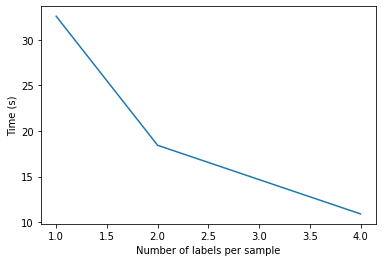

In [15]:
plot = plt.plot([1, 2, 4], times_elapsed)
t = plt.xlabel("Number of labels per sample")
t = plt.ylabel("Time (s)")

We got almost a 3x speedup for inference using 4 labels per sample compared to the vanilla cross-encoder with 1 label per sample